In [2]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
mnist = keras.datasets.mnist

In [4]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
print(x_train.shape,y_train.shape)

(60000, 28, 28) (60000,)


In [5]:
x_train,x_test=x_train/255.0,x_test/255.0

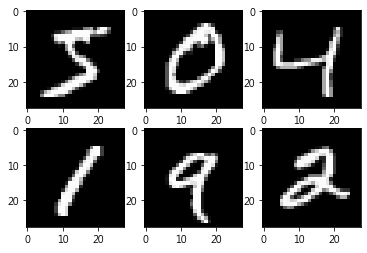

In [6]:
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(x_train[i],cmap='gray')
plt.show()

In [7]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10)#10是因为数字是0到9，一共10个输出
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [8]:
loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optim=keras.optimizers.Adam(learning_rate=0.001)
metrics=['accuracy']
model.compile(loss=loss,optimizer=optim,metrics=metrics)

In [9]:
batch_size =64
epochs=5
model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,shuffle=True,verbose=2)

Epoch 1/5
938/938 - 1s - loss: 0.3026 - accuracy: 0.9145 - 1s/epoch - 1ms/step
Epoch 2/5
938/938 - 1s - loss: 0.1327 - accuracy: 0.9611 - 962ms/epoch - 1ms/step
Epoch 3/5
938/938 - 1s - loss: 0.0919 - accuracy: 0.9732 - 1s/epoch - 1ms/step
Epoch 4/5
938/938 - 1s - loss: 0.0691 - accuracy: 0.9801 - 983ms/epoch - 1ms/step
Epoch 5/5
938/938 - 1s - loss: 0.0542 - accuracy: 0.9846 - 944ms/epoch - 1ms/step


In [10]:
model.evaluate(x_test,y_test,batch_size=batch_size,verbose=2)

157/157 - 0s - loss: 0.0821 - accuracy: 0.9738 - 215ms/epoch - 1ms/step


[0.08210436254739761, 0.973800003528595]

# 保存模型

有SavedModel方式，也有HDF5<br/>
SavedModel:'文件名'<br/>
HDF5:'文件名.h5'<br/>

In [11]:
model.save('nn1.h5')
model.save('nn2')

INFO:tensorflow:Assets written to: nn2\assets


# 使用保存的模型

In [12]:
new_model=keras.models.load_model('nn1.h5')
model.evaluate(x_test,y_test,batch_size=batch_size,verbose=2)

157/157 - 0s - loss: 0.0821 - accuracy: 0.9738 - 119ms/epoch - 758us/step


[0.08210436254739761, 0.973800003528595]

保存权重

In [13]:
model.save_weights("nn.")

保存架构

In [14]:
json_string = model.to_json()

with open("nn_model.json","w") as f:
    f.write(json_string)


读取架构

In [16]:
with open("nn_model.json","r") as f:
    loaded_json_string = f.read()
    

使用架构训练

In [17]:
new_model = keras.models.model_from_json(loaded_json_string)
print(new_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None
